# Machine Learning Portfolio
## Unsupervised Learning
## Author: Brandon Pippin

## Project: Commodity Flow Survey Insights


This is a modified notebook based on a Udacity clustering / PCA project. I'm modifying it to be more of a 'deliverable' for analysis of other datasets.

Special Release of an Experimental Data Product
(Issued June 15, 2015)

The first generation 2012 Commodity Flow Survey (CFS) Public Use Microdata (PUM) file is now available. This new, experimental data product contains information for approximately 4.5 million shipments obtained from businesses included in the 2012 CFS. The PUM file provides access to shipment-level characteristics while continuing to protect the confidentiality of individual business information. PUM file users can create customized tables and build models to track and analyze the movement of commodities.

Confidentiality
Policies and statistical safeguards ensure that both the records within and any tabulations produced from the 2012 CFS Public Use Microdata file will not identify any individuals or businesses.

Methods of preventing disclosure include the extensive review and analysis of the microdata file prior to its release, as well as the use of data suppression, data modification, and noise infusion. Please see the methodology for more information on disclosure avoidance techniques.

Contact Information
The 2012 CFS PUM file is an experimental data product and the Census Bureau solicits user feedback to continue to enhance its usefulness. If you have any questions or feedback you would like to provide us, please contact the Commodity Flow Branch staff by e-mail at ERD.CFS@census.gov or by phone at (301) 763-2108.

## Introduction






In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("/Users/brandonpippin/Desktop/cfs_2012_pumf_csv.txt")
    data.drop(['ORIG_STATE', 'DEST_STATE'], axis = 1, inplace = True)
    print "Commodity Flow dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    
data = data.sample(n=1000)

print "Subset of Commodity Flow dataset has {} samples with {} features each.".format(*data.shape)

Commodity Flow dataset has 4547661 samples with 5 features each.
Subset of Commodity Flow dataset has 1000 samples with 5 features each.


## Data Exploration


This section provides a statistical description of the dataset, considers the relevance of each feature, and selects a few sample data points from the dataset which you will track through the course of this report.



In [2]:
# Display a description of the dataset
display(data.describe())

,NAICS,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6549.136000,7.428000,7634.748000,10341.598000,353.302000
std,42846.123196,4.351523,27086.344414,29520.595839,530.384682
min,212.000000,0.000000,1.000000,1.000000,1.000000
25%,326.000000,4.000000,164.750000,12.000000,15.000000
50%,4231.000000,5.000000,712.500000,186.000000,87.500000
75%,4241.000000,14.000000,3481.000000,4834.250000,476.500000
max,551114.000000,15.000000,427667.000000,489619.000000,2681.000000


In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [ 1,2,3]

# Create a DataFrame of the chosen samples
samples = data.sample(n=5)

print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,NAICS,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC
2495602,332,4,180312,12369,1189
2986139,4237,5,30,8,4
2600228,336,5,1014,929,25
3001056,4247,5,2239,3918,138
2923678,4241,14,1917,36,3


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of commodity could each of the three samples you've chosen represent?






**Answer:**

* What kind of establishment (customer) could each of the three samples you've chosen represent?

Sample 0 appears to be 
Sample 1 appears to be 
Sample 2 

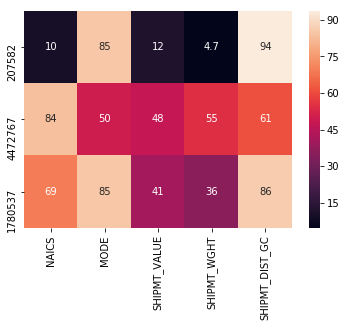

In [4]:
import seaborn as sns

percentiles_data = 100*data.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]
sns.heatmap(percentiles_samples, annot=True)

### Implementation: Feature Relevance


In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
# features = samples.drop(['Detergents_Paper'],1)
# wildcard = samples['Detergents_Paper']

# Post-Review Revised Code

features = data.drop(['MODE'],1)
wildcard = data['MODE']

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, wildcard, test_size=0.25, random_state=23)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=2, random_state=23)
regressor.fit(X_train, y_train)
results = regressor.predict(X_test)
display(results)
# TODO: Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
score = regressor.score(X_test, y_test)
print "score"
display(score)

array([ 7.61481481,  4.90120482,  4.90120482,  4.90120482,  7.61481481,
        4.90120482,  4.90120482, 13.06701031,  4.90120482,  4.90120482,
        4.90120482,  7.61481481, 13.06701031,  4.90120482,  4.90120482,
        4.90120482,  7.61481481,  4.90120482, 13.06701031,  4.90120482,
       13.06701031,  4.90120482,  4.90120482,  7.61481481,  7.61481481,
       13.06701031,  4.90120482,  4.90120482,  4.90120482,  4.90120482,
        7.61481481, 13.06701031,  4.90120482,  4.90120482,  4.90120482,
        4.90120482,  4.90120482,  4.90120482, 13.06701031,  7.61481481,
       13.06701031,  4.90120482, 13.06701031,  4.90120482, 13.06701031,
       13.06701031,  4.90120482, 13.06701031,  4.90120482, 13.06701031,
       13.06701031,  4.90120482,  4.90120482,  7.61481481,  4.90120482,
        4.90120482,  4.90120482, 13.06701031,  4.90120482, 13.06701031,
        4.90120482, 13.06701031,  4.90120482,  4.90120482,  7.61481481,
       13.06701031,  4.90120482,  4.90120482,  4.90120482,  4.90

score


0.45206267526037247

### Highlight: Predictions of Shipping Transport Type

* Which feature did you attempt to predict?
1st try: MODE - ie Shipping Transport Type

* What was the reported prediction score? 
1st try: .55



**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

### Visualize Feature Distributions


## To get a better understanding of the dataset, review the scatter matrix of each of the features present in the data. 

If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.


/Users/brandonpippin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


ValueError: Axis limits cannot be NaN or Inf

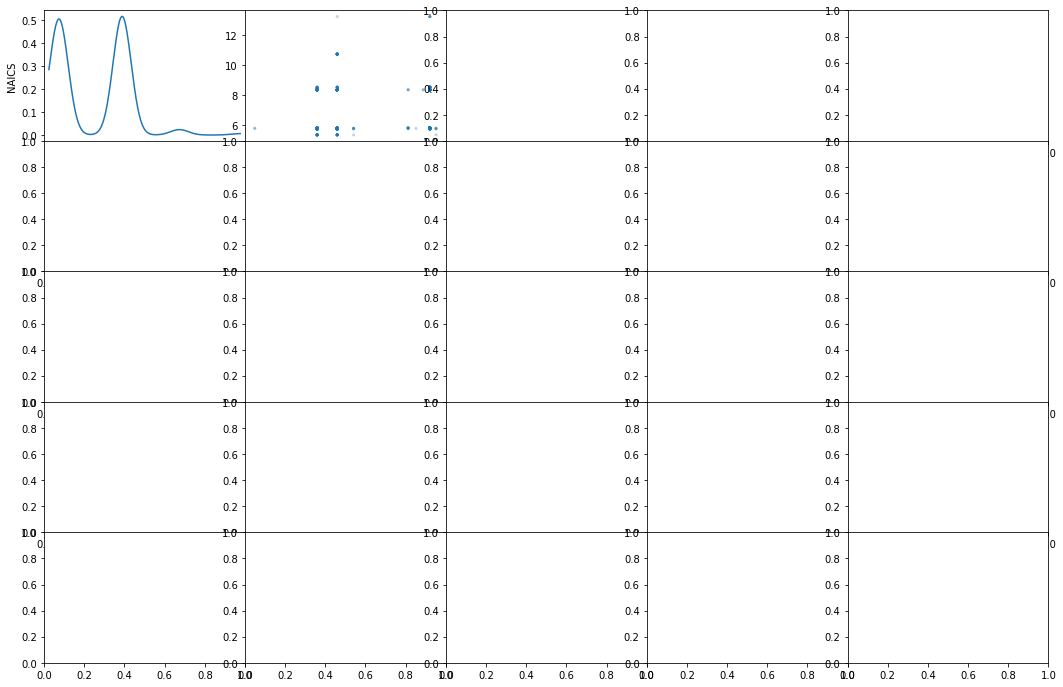

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (18,12), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

,NAICS,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC
2495602,5.805135,1.386294,12.102444,9.422949,7.080868
2986139,8.351611,1.609438,3.401197,2.079442,1.386294
2600228,5.817111,1.609438,6.921658,6.834109,3.218876
3001056,8.353968,1.609438,7.713785,8.273337,4.927254
2923678,8.352554,2.639057,7.558517,3.583519,1.098612


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # POST-REVIEW
    # I used the feedback to directly reference the feature upon which
    # we are iterating in the code above.
    # Still having trouble getting 42 Tukey outliers in total.
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    
    # POST-REVIEW CORRECTED STEP CALC
    step = 1.5*(Q3 - Q1)
    # The code below is from link below, and inspired my answer.
    # https://stackoverflow.com/questions/23228244/how-do-you-find-the-iqr-in-numpy
    # q75, q25 = np.percentile(x, [75 ,25])
    # iqr = q75 - q25
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'NAICS':


,NAICS,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC
4265988,13.219697,2.639057,9.630300,1.791759,7.511525
2338120,13.219697,2.639057,6.976348,2.944439,6.590301
1240242,13.219697,2.639057,6.186209,1.791759,6.308098
2681545,13.219697,1.609438,9.329101,10.650839,3.713572
1580380,13.219697,2.639057,4.997212,2.079442,5.998937
2046841,13.219697,2.639057,4.442651,2.397895,2.079442


Data points considered outliers for the feature 'MODE':


,NAICS,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC
3042682,5.817111,-inf,9.033006,4.663439,7.640123


Data points considered outliers for the feature 'SHIPMT_VALUE':


,NAICS,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC
2995001,8.539150,2.639057,0.0000,0.000000,1.609438
229475,8.539150,2.639057,0.0000,0.000000,0.693147
2013149,8.350902,2.397895,12.9661,6.664409,7.085901
355022,8.351375,2.397895,0.0000,0.000000,5.214936
3658305,5.783825,2.639057,0.0000,0.000000,4.143135


Data points considered outliers for the feature 'SHIPMT_WGHT':


,NAICS,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC


Data points considered outliers for the feature 'SHIPMT_DIST_GC':


,NAICS,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* Are there any data points considered outliers for more than one feature based on the definition above? 



## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in **six dimensions** with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [10]:
# I referenced the below page for this section
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
print(pca)
# Below: just making 100% sure my dimensions=features
#print log_samples
# TODO: Transform log_samples using the PCA fit above
# FIXED AFTER FIRST REVIEW
pca.fit(good_data)
pca_samples = pca.transform(log_samples)
# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
# after 4 days of trying to answer the next question set, I found this:
display(pca_results.cumsum())

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

*How much variance in the data is explained in total by the first and second principal component?*

71%

*How much variance in the data is explained by the first four principal components?*

93%

*Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.*

*Talk about each dimension:

*Discuss 1st 4 dimensions:

Dimension1: 

Dimension2:

Dimension3:

Dimension4:

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [74]:
# I had this fail repeatedly until I realized I needed to use pca.fit_transform instead
# of just pca.fit 
# I assume Udacity intentionally misleads us by using this term: pca.transform in the
# implementation PCA to make the student figure it out.

# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.2602,2.2388,-0.7748,1.9684,-0.5323,0.5181
1,1.7273,2.8361,-0.6826,-0.6252,-0.2984,0.0693
2,4.7166,-0.1576,1.7636,-0.5059,1.4696,0.1598
3,-4.3447,0.7176,0.6039,-1.1068,-1.0422,-0.1982
4,1.8773,-1.2262,1.2232,0.2509,-1.2627,0.0245


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [75]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [76]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.2602,2.2388
1,1.7273,2.8361
2,4.7166,-0.1576
3,-4.3447,0.7176
4,1.8773,-1.2262


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

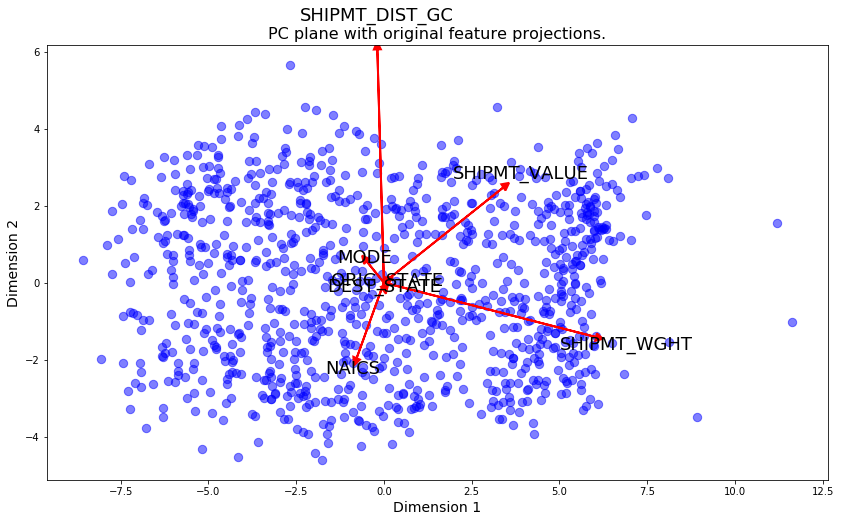

In [77]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 

* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

What are the advantages to using a K-Means clustering algorithm?

K-Means can give tight (distinct) clusters and can be computationally faster than other clustering algorithms. Speed isn't an advantage in a project like this, however.

What are the advantages to using a Gaussian Mixture Model clustering algorithm?

GMM is a great clusterer for tasks with a large number of potential categories - like topic identification in newspaper data, and that is it's advantage. Our data appears to represent a small group of distinct business types, and the business type options could

Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why? K-means, because GMM seems like the absolute wrong model. 

* Revised Answer *

*Could you please be a little more specific while justifying your decision to use KMeans? What aspect of the data distribution supports the choice of KMeans over GMM?

Honestly, I can't see from the above distribution how the data supports using K-Means. It's only after we start to focus on customer segments, and the problem becomes binary, that using K-Means is revealed to be the right choice. To me anyway...


*Could you also talk about on one of the main differences between the two algorithms: soft v/s hard clustering.

Soft clustering identifies the likelihood of a data point being in a specific cluster. In that regard, it sort of complements K-Means' cluster shape 'rigidity', in that the data point can fall outside the cluster, but still be associated with that cluster. I hope I said that right.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [78]:
from sklearn.cluster import KMeans
from sklearn import metrics

# TODO: Apply your clustering algorithm of choice to the reduced data 
# Relevant Question: Report the silhouette score for several cluster numbers you tried.
clusterer = KMeans(n_clusters=2, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
# the below link helped
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
# Is this pca_samples????? 
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
labels = clusterer.labels_
score = metrics.silhouette_score(reduced_data, labels)
print score


0.49385387901625893


### Question 7

* Report the silhouette score for several cluster numbers you tried. 

* Of these, which number of clusters has the best silhouette score?


**Answer:**
Clusters = 2 then silhouette score = 0.4232 Clusters = 4 then silhouette score = 0.3301 Clusters = 6 then silhouette score = 0.3508

** Revised Answer 1 **
I explored setting the clusters to 3, as suggested in the project feedback. The Silhouette Score for Clustes=3 is .3985 - this does reinforce the original answer.

Best silhouette score? 2

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

IndexError: too many indices for array

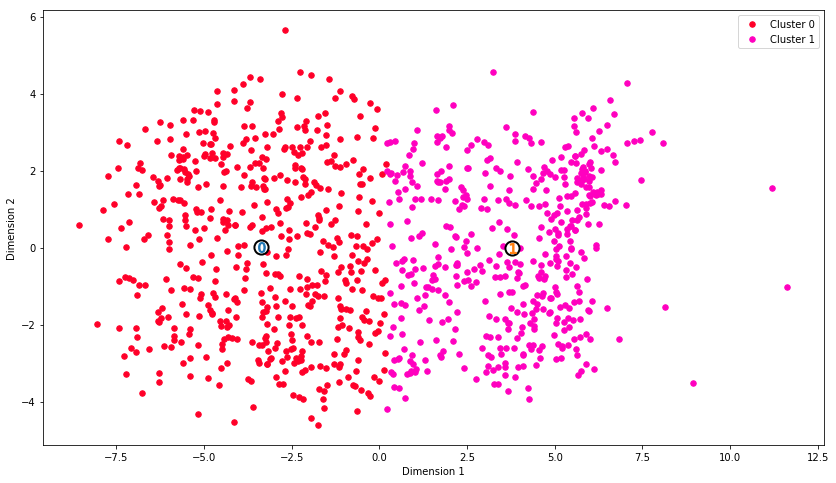

In [82]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers,sample_preds)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [83]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,ORIG_STATE,DEST_STATE,NAICS,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC
Segment 0,23.0,23.0,1831.0,8.0,183.0,17.0,99.0
Segment 1,25.0,23.0,836.0,5.0,5856.0,8297.0,80.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

*What set of establishments could each of the customer segments represent?

Segment 0 has a disproportionate share of Fresh vs all other features. This leads me to believe that it is a set of traditional, sit down restaurants which serve fresh foods mostly. The large Frozen number could certainly be the dessert side of the restaurant business. 

Segment 1 has a disproportionate amount of Milk, Grocery, and Detergents_Paper, and very little Frozen. These combinations remind me of a Convenience Store (at least in the US), where people will get frequently needed basic Grocery Store items while refueling.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [84]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1
Sample point 3 predicted to be in Cluster 0
Sample point 4 predicted to be in Cluster 1


**Answer:**

**For each sample point, which customer segment from Question 8 best represents it?**

Segment 1.

**Are the predictions for each sample point consistent with this?**

Yes! The biplot way above supports this.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

By applying the above machine learning techniques, and determining two major customer groups, the company can apply logic to their delivery service. For example, Fresh products are distinctly important to Segment 0. You can therefore derive that this group may not react well to not having daily delivery. As a result, a manager may determine that it is more cost effective to split Segment 0 and 1 into two separate delivery trucks. Segment 0, dependent on Fresh being fresh, could be a smaller truck delivering to a smaller group of customers, but on every day. Whereas Segment 1 could accept not getting truly fresh Fresh products, enabling the company to deliver 3 days a week to Segment 1.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Expanding on Answer #8, the distributer could likely label Segment 0 as Traditional Restaurant and Segment 1 as Convenience Store.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [85]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers,2)

Dataset could not be loaded. Is the file missing?


False

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 

K-Means with two clusters nails this task perfectly in my opinion.

* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 

I think so - Retailers correllates to Segment 1, which I called 'Convenience Store'. Basically two different ways of saying the same thing.

Hotels/Restaurants/Cafes aligns well with my suggested label for Segment 0 - 'Traditional Restaurant.


* Would you consider these classifications as consistent with your previous definition of the customer segments?

Absolutely. Thankfully!



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.